<a href="https://colab.research.google.com/github/Alejandro-A-DS/Clasificacion_accidentes_cerebrovasculares/blob/main/M6_AI2_AlvaradoSergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2.Accidentes Cerebrovasculares
---

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de, aproximadamente, el 11% del total de muertes.

Un accidente cerebrovascular ocurre cuando el suministro de sangre a una parte del cerebro se interrumpe o se reduce, lo que impide que el tejido cerebral reciba oxígeno y nutrientes. Las células cerebrales comienzan a morir en minutos.

Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de datos proporciona información relevante sobre el paciente.


Información de atributos:

- Id: identificador único.
- Gender: sexo biológico del paciente (Masculino, Femenino u Otro).
- Age: edad del paciente.
- Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
- Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca.
- Ever_married: si ha estado alguna vez casado (No / Yes).
- Work_type: tipo de trabajo (Children/Cuidado de hijos, Govt_job/funcionario del Gobierno, Never_worked/Nunca ha trabajado, Private/trabajador por cuenta ajena, Self-employeed/Trabajador por cuenta propia).
- Residence_type: tipología de su lugar de residencia (Rural/Urbano).
- Avg_glucose_level: nivel medio de glucosa en sangre.
- Bmi: índice de masa corporal (IMC).
- Smoking_status: Si alguna vez ha fumado o fuma (Fue fumador, Nunca ha fumado, - Fuma actualmente o Desconocido).
- Stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no lo tuvo.

Consideraciones:

- "Desconocido" en smoking_status significa que la información no está disponible para este paciente.
- IMC: peso en kilogramos dividido por el cuadrado de la talla en metros (kg/m2). Es un índice utilizado frecuentemente para clasificar el sobrepeso y la obesidad en personas adultas. La OMS define el sobrepeso como un IMC igual o superior a 25, y la obesidad como un IMC igual o superior a 30.
- La hipertensión, también conocida como tensión arterial alta o elevada, es un trastorno en el que los vasos sanguíneos tienen una tensión persistentemente alta, lo que puede dañarlos. Cada vez que el corazón late, bombea sangre a los vasos y estos llevan la sangre a todas las partes del cuerpo. La tensión arterial es la fuerza que ejerce la sangre contra las paredes de los vasos (arterias) al ser bombeada por el corazón. Cuánto más alta es la tensión, más esfuerzo tiene que realizar el corazón para bombear. Para establecer el diagnóstico de hipertensión, se han de tomar mediciones dos días distintos y, en ambas lecturas, la tensión sistólica ha de ser superior o igual a 140 mmHg y la diastólica superior o igual a 90 mmHg.

**Se pide:** aplicar el algoritmo de KNN para predecir accidentes cerebrovasculares en pacientes en función de las variables disponibles.

**Con todos estos datos, os pedimos lo siguiente:**

Preprocesado:

1. Convertir todas las variables categóricas a numéricas (gender, ever_married, work_type, residence_type, smoking_status).
- Existen 1544 personas de las que se desconoce si fuman o no; vamos a asignar también un número para esta posibilidad.
- Existen 201 personas de las que se desconoce su BMI (IMC); vamos a eliminar estos casos para la generación del modelo al tratarse de un bajo porcentaje (4%).
- Escalar los datos para su uso por el algoritmo.

2. Generar un modelo con el algoritmo de KNN.

3. Evaluación del modelo
- Calcula el Accuracy.
- Grafica la ROC-Curve.
- Grafica la Confusion-Matrix.
- Comenta los resultados.

**Consideraciones:**

Los resultados de los modelos pueden ser dispares dependiendo de diversos factores. No hay un modelo único correcto.
En cuanto al algoritmo, se pide que se prueben diferentes parametrizaciones buscando un modelo que generalice correctamente (tratar de evitar sobreajuste y subajueste).
Se valorará tanto la corrección de las respuestas como su presentación.

In [ ]:
# Librerías Necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.dpi'] = 110

In [ ]:
# Dataset de origen

url = "https://raw.githubusercontent.com/Alejandro-A-DS/Datos_Master/main/m6_ai2_act_healthcare-dataset-stroke-data.csv"

data = pd.read_csv(url)

data.drop(columns = ["id"], inplace=True)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Visualización rápida de la estructura del dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## 6.2.1 Preprocesado
---


### 6.2.1.1 Eliminación de valores nulos

Como podemor observar en el resumen del dataset, existen 201 personas de las cuales se desconoce su índice de masa corporal (`bmi`). Dado que asignar un valor a estar personas (como la media o moda) puede ser irresponsable en este tipo de análisis médicos, se eliminarán los registros cuyo `bmi` se desconoce.

In [ ]:
# Eliminación de observaciones con valores nulos

data.dropna(axis=0, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


### 6.2.1.2 Reemplazo de los valores "unknown" en la variable smoking_status

Existe una gran cantidad de personas cuyo estado de fumardor se desconoce.

In [ ]:
# Cantidad de apariciones de cada valor único en la variables smoking_status

data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

Estas personas con "unknown" en la variable smoking_status representan un 30% del total de observaciones en el dataset, por lo que para imputar algun valor, se mirará dentro de la cantidad de personas que tuvieron un derrame cerebral las cantidades totales de valores únicos.

In [ ]:
# Cantidad de aparciones de cada valor único

data.loc[data['stroke'] == 1, 'smoking_status'].value_counts()

never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: smoking_status, dtype: int64

Dentro de las personas que tuvieron un derreme cerebral, las personas fumadoras representan una menor proporción que las demás, por esto considerará asignar aleatoriamente (pseudo aleatoriamente) valores entre `never smoked`, `formerly smoked` y `smokes` a estos valores "Unknown".

In [ ]:
# Asignación aleatoria de valores

random.seed(7)
data.loc[data['smoking_status'] == "Unknown", "smoking_status"] = random.choice(['never smoked', 'formerly smoked', 'smokes'])

In [ ]:
# Cantidad de aparciones de cada valor único después

data['smoking_status'].value_counts()

formerly smoked    2320
never smoked       1852
smokes              737
Name: smoking_status, dtype: int64

### 6.2.1.3 Conversión de variables categóricas a numéricas

Una vez tenemos el dataset valores nulos, procedemos a transformar las variables categóricas en numéricas. Estas variables a transformar son:

- gender.
- ever_married.
- work_type.
- residence_type.
- smoking_status.

In [ ]:
# Creación del dataset tranformndo las variables categóricas en numéricas

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnas_categoricas = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
columnas_numericas = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

transformador = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), columnas_categoricas)],
                                  remainder='passthrough')

data_numeric = transformador.fit_transform(data)

nombres_columnas = list(transformador.named_transformers_['onehot'].get_feature_names_out(columnas_categoricas))
nombres_columnas.extend(columnas_numericas)

data_numeric = pd.DataFrame(data=data_numeric, columns=nombres_columnas)

data_numeric.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0,1.0


En el dataframe anterior se observa que al realizar la codificación de variables categóricas se obtuvo un total de 22 variables (incluyendo el vector objetivo). Para verificar Que es el número correcto se sumará el total de valores únicos en las variables categóricas junto con las variables numéricas y el resultado debería ser 22:

In [ ]:
# Cantidad de valores únicos en las variables categóricas

data[columnas_categoricas].apply(lambda x: x.nunique(), axis=0).sum()

15

In [ ]:
# Columnas numéricas

data[columnas_numericas].shape[1]

6

Efectivamente el proceso de codificación se llevó a cabo correctamente, ya que se tienen 16 valores unicos y 6 columnas numéricas que en conjunto suman 22 (número de columnas del dataframe codificado).

### 6.2.1.4 Escalamiento del dataframe a trabajar

Dada la naturaleza del algoritmo KNN, es necesario que las distancias que se calcularán no sean distancias absolutas, dado que eso puede generar resultados no deseados considerando el rango de cada una de las variables. Por eso es necesario trabajar con valores relativos los cuales no se vean afecados por los rangos de estas variables.

In [ ]:
# Separación del dataframe codificado entre matriz de observaciones (X) y vector objetivo (y)

X = data_numeric.iloc[:,0:-1].copy()
y = data_numeric['stroke'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xs = scaler.fit_transform(X)

## 6.2.2 Generación de modelo KNN
---
La cantidad de personas que han sufrido un derrame cerebral (stroke) es menor al 5% dentro del dataset de observaciones, por lo que las clases están desequilibradas. Para poder elegir el mejor número de vecinos se utilizará validación cruzada y de esta manera evitar tener un clasificador que no pueda predecir apropiadamente cada una de las dos clases objetivo.

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

preds_list = []
score_list = []
k_list = []
weight = "distance"
metric = "euclidean"

for k in list(range(1, 50, 2)):

  knn_model = KNeighborsClassifier(n_neighbors=k,
                                   weights=weight,
                                   metric=metric)

  preds = cross_val_predict(knn_model,
                            Xs,
                            y,
                            cv=10,
                            method="predict",
                            n_jobs=3)

  score = cross_val_score(knn_model,
                          Xs,
                          y,
                          cv=10,
                          scoring="accuracy")

  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

df_scores = pd.DataFrame({"K":k_list,
                          "score":score_list
                          })

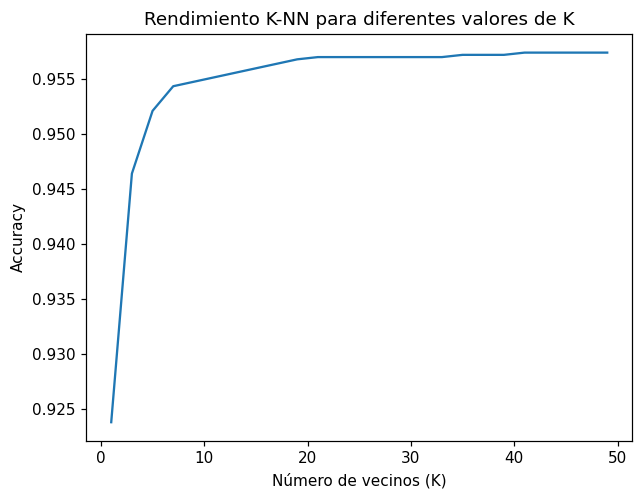

In [ ]:
# Gráfica de Accuracy

sns.lineplot(x="K", y="score", data = df_scores). \
set(xlabel='Número de vecinos (K)',
    ylabel='Accuracy',
    title="Rendimiento K-NN para diferentes valores de K");

In [ ]:
df_scores.head(25)

,K,score
0,1,0.923814
1,3,0.946425
2,5,0.952129
3,7,0.954370
4,9,0.954777
5,11,0.955185
6,13,0.955593
7,15,0.956000
8,17,0.956407
9,19,0.956814


Al ver la gráfica anterior y en la tabla se observa que aporzimadamente para un valor de k mayor o igual a 21 se obtiene un valor constante para el score. Por lo que se utilizará este valor para la evaluación del modelo.

## 6.2.3 Evaluación del modelo

In [ ]:
k=21
folds=10

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
preds = cross_val_predict(knn_model, X, y, cv=folds, method="predict", n_jobs=5)
score = cross_val_score(knn_model, X, y, cv=folds, scoring="accuracy", n_jobs=5)
print("Accuracy por capa: " , score)
print("Accuracy media: ", np.mean(score))

Accuracy por capa:  [0.95723014 0.95723014 0.95723014 0.95723014 0.95723014 0.95723014
 0.95723014 0.95723014 0.95723014 0.95918367]
Accuracy media:  0.9574254956565111


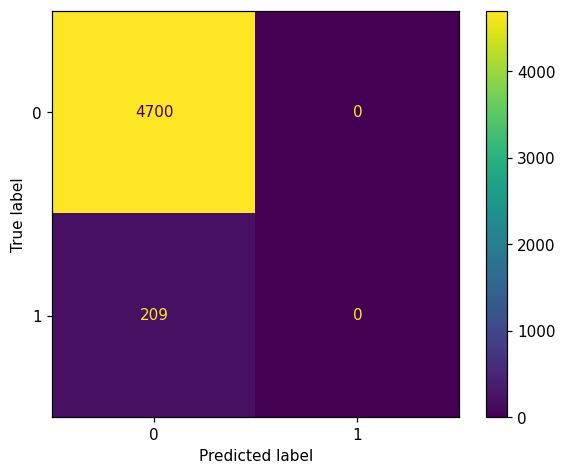

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, preds)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
from sklearn.metrics import classification_report

print(f"Informe de Clasificación:\n"
      f"{classification_report(y, preds)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4700
         1.0       0.00      0.00      0.00       209

    accuracy                           0.96      4909
   macro avg       0.48      0.50      0.49      4909
weighted avg       0.92      0.96      0.94      4909



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Los resultados obtenidos con este primer clasificados no son muy alentadores más allá de ver un 96% de precisión (que en este caso no es nada sorprendente), ya que no es capaz de clasificar correctamente ningún caso de derrame cerebral, lo cual es bastante crítico considerando el impacto y la naturaleza de la situación. Se ha obtenido una gran cantidad de falsos negativos (209). Debido a esto es necesario modificar el umbral de clasificación para reducir el número de falsos negativos ya que es preferible tratar a una persona que no tiene ningún problema a no tratar a una persona que sí tiene un problema, en este caso un derrame cerebral, por lo que es necesario aumentar el Recall a partir de la reducción del umbral de decisión que por defecto para KNN es 50%.

In [ ]:
# Modelo KNN

knn_model = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
probs = cross_val_predict(knn_model, X, y, cv=folds, method="predict_proba", n_jobs=3)
preds = cross_val_predict(knn_model, X, y, cv=folds, method="predict", n_jobs=3)

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y,probs[:,1])

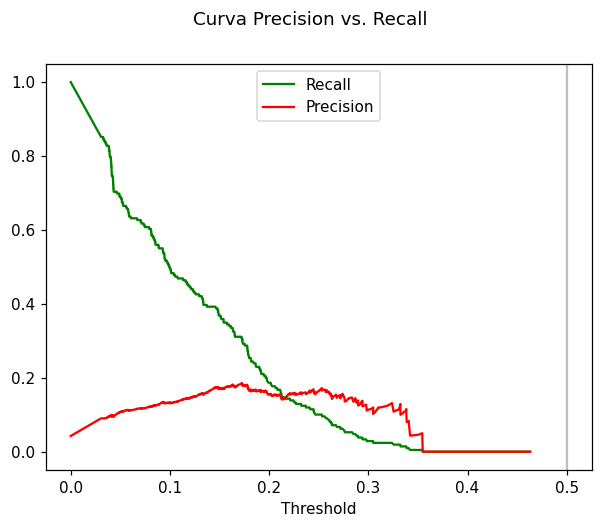

In [ ]:
# Gráfica de Recall

plt.plot(threshold, recall[:-1], c="green", label="Recall")
plt.plot(threshold, precision[:-1], c="red", label="Precision")
plt.axvline(0.5, alpha=0.5, c="gray")
plt.suptitle("Curva Precision vs. Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

Para mirar el cambio en las clasificaciones, se trabajarán valores de probabilidad superiores a 0.05, superiores a 0.10 y superiores a 0.15 para ver cómo cambian los resultados:

In [ ]:
# Cambio de probabilidades para mejorar predicciones

df_dict = {"prob_class0": probs[:,0],
           "prob_class1": probs[:,1],
           "preds":preds}

df_probs = pd.DataFrame(df_dict)

df_probs["preds_05"] = 0
df_probs["preds_10"] = 0
df_probs["preds_15"] = 0

df_probs.loc[df_probs["prob_class1"]>0.05, "preds_05"] = 1
df_probs.loc[df_probs["prob_class1"]>0.10, "preds_10"] = 1
df_probs.loc[df_probs["prob_class1"]>0.15, "preds_15"] = 1

df_probs

,prob_class0,prob_class1,preds,preds_05,preds_10,preds_15
0,0.868106,0.131894,0.0,1,1,0
1,0.818352,0.181648,0.0,1,1,1
2,1.000000,0.000000,0.0,0,0,0
3,0.834586,0.165414,0.0,1,1,1
4,0.661784,0.338216,0.0,1,1,1
...,...,...,...,...,...,...
4904,1.000000,0.000000,0.0,0,0,0
4905,0.861368,0.138632,0.0,1,1,0
4906,1.000000,0.000000,0.0,0,0,0
4907,0.844599,0.155401,0.0,1,1,1


Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85      4700
         1.0       0.11      0.69      0.19       209

    accuracy                           0.74      4909
   macro avg       0.54      0.72      0.52      4909
weighted avg       0.94      0.74      0.82      4909



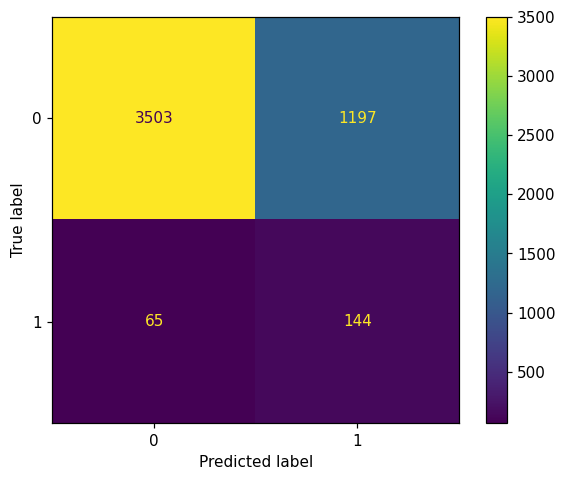

In [ ]:
# Resultados para probabilidad superiores a 0.05

preds05 = df_probs["preds_05"].values
cm = confusion_matrix(y, preds05)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print(f"Informe de Clasificación:\n"
      f"{classification_report(y, preds05)}")

Repetir el proceso para los otros valores de probX y hacer enfásis en que tamibien es necesario contemplar los costos involucrados al diagnosticar tantos pacientes como falsos positivos.

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      4700
         1.0       0.13      0.50      0.21       209

    accuracy                           0.84      4909
   macro avg       0.55      0.68      0.56      4909
weighted avg       0.94      0.84      0.88      4909



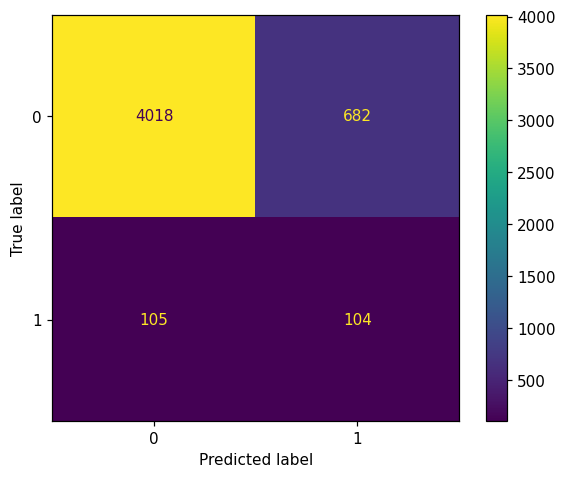

In [ ]:
# Resultados para probabilidad superiores a 0.10

preds10 = df_probs["preds_10"].values
cm = confusion_matrix(y, preds10)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print(f"Informe de Clasificación:\n"
      f"{classification_report(y, preds10)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      4700
         1.0       0.17      0.37      0.23       209

    accuracy                           0.90      4909
   macro avg       0.57      0.64      0.59      4909
weighted avg       0.94      0.90      0.91      4909



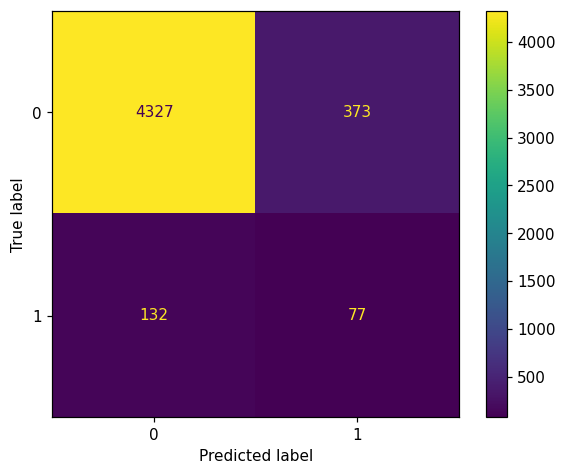

In [ ]:
# Resultados para probabilidad superiores a 0.15

preds15 = df_probs["preds_15"].values
cm = confusion_matrix(y, preds15)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

print(f"Informe de Clasificación:\n"
      f"{classification_report(y, preds15)}")

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = cross_val_predict(knn_model,
                           X,
                           y,
                           cv=5,
                           method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_prob)

auc = roc_auc_score(y, y_prob)

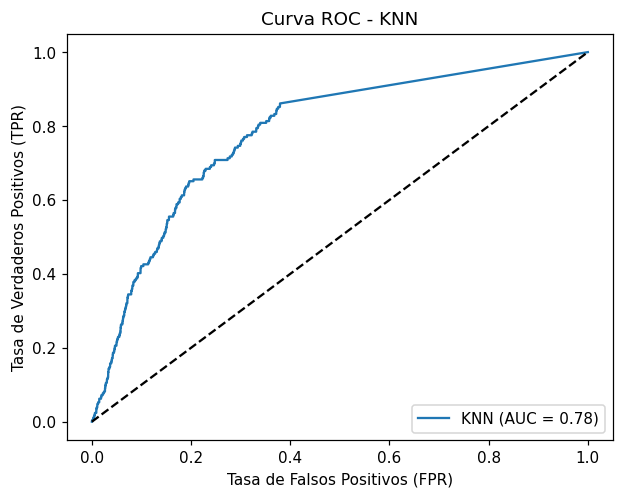

In [ ]:
# Gráfica ROC curve

plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN')
plt.legend(loc='lower right')
plt.show()

Viendo los resultados de las matrices de confusión para los umbrales de clasificación y la gráfica ROC para nuestro modelo, podemos observar un patrón interesante, cuanto menor sea el umbral de probabilidad, habrá una mayor cantidad de verdaderos positivos clasificados por nuestro algoritmo, sin embargo el número de falsos positivos también aumenta en gran cantidad. También a través de la ROC curve se observa que el mejor clasificador que pondemos obtener es uno con una tasa de Falsos positivos de 0.40 y una tasa de verdaders positivos de aproximadamente 0.85. A partir de este punto la reducción de verdaderos positivos desminuye con mucha más rapidez que la tasa de falsos positivos por lo que en este caso, no nos conviene.
Cuanto menor sea nuestro umbral de clasificación mayor cantidad de verdaderos positivos obtenemos, pero también mayor cantidad de falsos positivos. Si bien esto podría no ser adecuado, como detector de `strokes` en diferentes personas al primera instancia sería una buena herramienta. Este algoritmo está lejos de poder ser utilizado en casos de vital importancia, con algunos ajustes (inclusión de nuevas variables explicativas, recompilación de más ejemplos, etc.) podría ayudar a un diagnostico preliminar en la detección de accidentes cerebrovasculares.